## Hypothesis: Students who go to office hours more often for each assignment think that programming is effective

In [2]:
%reload_ext autoreload
%autoreload 2

### I will convert the csv into a table with columns

In [3]:
from data_utils import read_csv_rows, columnar
data_rows: list[dict[str, int]] = read_csv_rows('../../data/survey.csv')
columns: dict[str, list[int]] = columnar(data_rows)

### I will select the columns for office hour attendance and is programming effective

In [4]:
from data_utils import head, select
oh_table: dict[str, list[int]] = select(columns, ["oh_visits"])
print(head(oh_table, 5))
program_effect_table: dict[str, list[int]] = select(columns, ["programming_effective"])
print(head(program_effect_table, 5))


{'oh_visits': ['2', '5', '5', '0', '0']}
{'programming_effective': ['3', '3', '3', '6', '6']}


### I will convert these into lists of numbers

In [5]:
def num_list(dct: dict[str, list[int]], val: str) -> list[int]:
    result: list[int] = []
    lst: list[str] = dct[val]
    i: int = 0
    while i < len(lst):
        if lst[i] == "0":
            result.append(0)
        if lst[i] == "1":
            result.append(1)
        if lst[i] == "2":
            result.append(2)
        if lst[i] == "3":
            result.append(3)
        if lst[i] == "4":
            result.append(4)
        if lst[i] == "5":
            result.append(5)
        if lst[i] == "6":
            result.append(6)
        if lst[i] == "7":
            result.append(7)
        i += 1
    return result


pro_eff_lst: list[int] = num_list(program_effect_table, "programming_effective")
oh_vis_lst: list[int] = num_list(oh_table, "oh_visits")

### I will separate office hour visits based on whether students go to them (value greater than 0) or not (value of 0)

In [6]:
def mask(lst: list[int]) -> list[bool]:
    result: list[bool] = []
    i: int = 0
    while i < len(lst):
        t_f: bool = lst[i] != "0"
        result.append(t_f)
        i += 1
    return result


oh_attended: list[bool] = mask(oh_vis_lst)

### I will make a list of the how effective people who go to office hours think programming exercises are

In [7]:
def masked(lst: list[int], msk: list[bool]) -> list[int]:
    result: list[int] = []
    i: int = 0
    while i < len(lst):
        if msk[i] == True:
            result.append(lst[i])
        i += 1
    return result


effective_oh_t: list[int] = masked(pro_eff_lst, oh_vis_lst)

### I will make a list of how effective people who don't go to office hours think programming exercises are

In [8]:
def masked_2(lst: list[int], msk: list[bool]) -> list[int]:
    result: list[int] = []
    i: int = 0
    while i < len(lst):
        if msk[i] == False:
            result.append(lst[i])
        i += 1
    return result


effective_oh_f: list[int] = masked_2(pro_eff_lst, oh_vis_lst)

### I will now find the mean value for each of the two lists established previously

In [9]:
def mean(lst: list[int]) -> float:
    return sum(lst) / len(lst)


mean_t: float = mean(effective_oh_t)
mean_f: float = mean(effective_oh_f)
print(mean_t)
print(mean_f)


6.1171875
6.37956204379562


### I will graph count the amount of times each level of effectiveness was included in each list

In [13]:
oh_t_count: list[int] = []
oh_t_count.append(effective_oh_t.count(1))
oh_t_count.append(effective_oh_t.count(2))
oh_t_count.append(effective_oh_t.count(3))
oh_t_count.append(effective_oh_t.count(4))
oh_t_count.append(effective_oh_t.count(5))
oh_t_count.append(effective_oh_t.count(6))
oh_t_count.append(effective_oh_t.count(7))

oh_f_count: list[int] = []
oh_f_count.append(effective_oh_f.count(1))
oh_f_count.append(effective_oh_f.count(2))
oh_f_count.append(effective_oh_f.count(3))
oh_f_count.append(effective_oh_f.count(4))
oh_f_count.append(effective_oh_f.count(5))
oh_f_count.append(effective_oh_f.count(6))
oh_f_count.append(effective_oh_f.count(7))

print(oh_t_count)
print(oh_f_count)

[1, 0, 3, 5, 25, 30, 64]
[0, 1, 1, 4, 15, 34, 82]


### I will graph the previous data

<AxesSubplot:>

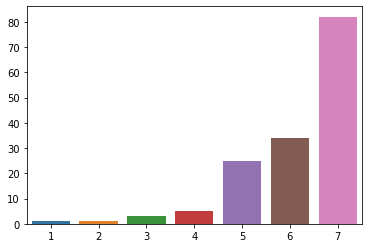

In [15]:
import seaborn
seaborn.barplot(x=[1, 2, 3, 4, 5, 6, 7], y=oh_t_count)

<AxesSubplot:>

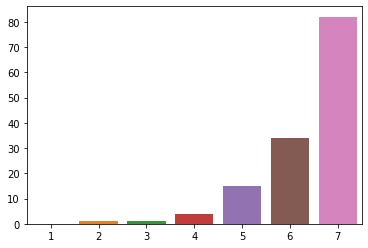

In [16]:
seaborn.barplot(x=[1, 2, 3, 4, 5, 6, 7], y=oh_f_count)

In [ ]:
#### There is not a large difference in how people who did and did not go to office hours rated the effectiveness of programming exercises. The hypothesis wa sincorrect, people who did not go to office hours actually found the assignments more effective (score of 6.38 versus 6.12). The graphs above show that there is not a substantial difference in frequencies of each score for the two groups. In the future, it might be interesting to explore whether people who went to office hours were more likely to go to tutoring or if there was difference in the grades people thought that they would get.